In [20]:
import netCDF4 as nc
import numpy as np
import pystan
import arviz

events = ["GW150914","GW170104","GW170823","GW190519_153544",
		"GW190521","GW190521_074359","GW190706_222641",
		"GW190828_063405","GW200224_222234","GW200311_115853"]

ds = {}
points = {}

for event in events:
	fn = f"./ChargedResults/{event}/{event}-charged-posteriors.nc"
	a = nc.Dataset(fn)
	ds[event] = a
	print(event)
	points[event] = np.array([np.array(x) for x in zip(a['posterior']['chi'][:].flatten(),a['posterior']['Q_charge'][:].flatten())])


GW150914
GW170104
GW170823
GW190519_153544
GW190521
GW190521_074359
GW190706_222641
GW190828_063405
GW200224_222234
GW200311_115853


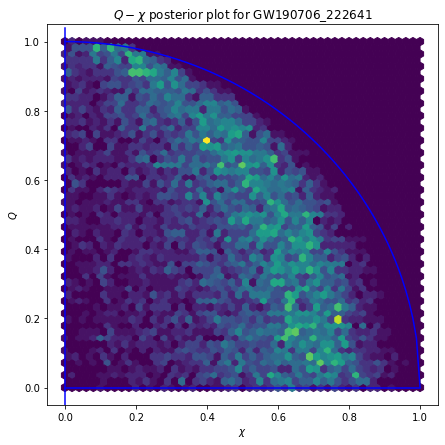

In [14]:
import matplotlib.pyplot as plt

eventname = 'GW190706_222641'
fig, ax = plt.subplots(1,figsize=(7,7))
ax.plot(np.linspace(0,1,100), np.sqrt(1 - np.linspace(0,1,100)**2),c='b')
ax.plot(np.linspace(0,1,100), 0.0*np.linspace(0,1,100),c='b')
ax.axvline(0.0,ymin=0.0,ymax=0.99,c='b')
ax.hexbin(x = points[eventname][:,0], y = points[eventname][:,1],gridsize=50, extent=(0,1,0,1))
ax.set_xlabel("$\chi$")
ax.set_ylabel("$Q$")
ax.set_title(f"$Q-\chi$ posterior plot for {eventname}")
plt.show()

In [15]:
## Changing Variables:
def chiq_to_rtheta(arr):
    A = np.sqrt(arr[:,0]**2 + arr[:,1]**2)
    theta = np.arctan(arr[:,1]/arr[:,0])
    return np.array([A,theta]).transpose()

def rtheta_to_chiq(arr):
    chi = arr[:,0]*np.cos(arr[:,1])
    Q = arr[:,0]*np.sin(arr[:,1])
    return np.array([chi,Q]).transpose()





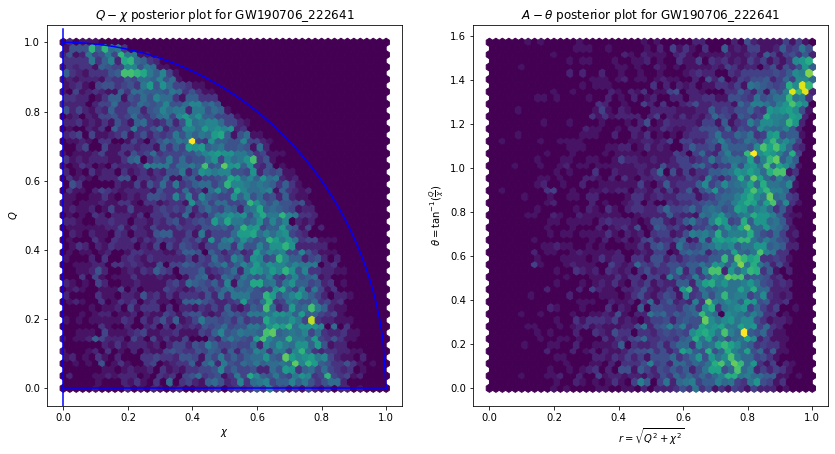

In [17]:
eventname = 'GW190706_222641'
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(14,7))
ax1,ax2 = axes
newpoints = chiq_to_rtheta(points[eventname])


ax1.plot(np.linspace(0,1,100), np.sqrt(1 - np.linspace(0,1,100)**2),c='b')
ax1.plot(np.linspace(0,1,100), 0.0*np.linspace(0,1,100),c='b')
ax1.axvline(0.0,ymin=0.0,ymax=0.99,c='b')
ax1.hexbin(x = points[eventname][:,0], y = points[eventname][:,1],gridsize=50, extent=(0,1,0,1))
ax1.set_xlabel("$\chi$")
ax1.set_ylabel("$Q$")
ax1.set_title(f"$Q-\chi$ posterior plot for {eventname}")

ax2.hexbin(x = newpoints[:,0], y = newpoints[:,1],gridsize=50, extent=(0,1,0,np.pi/2))
ax2.set_xlabel("$r = \\sqrt{Q^2 + \\chi^2}$")
ax2.set_ylabel("$\\theta = \\tan^{-1}(\\frac{Q}{\chi})$")
ax2.set_title(f"$A-\\theta$ posterior plot for {eventname}")
plt.show()

### Pystan tutorial

In [25]:
coin_dat = {
             'n': 100,
             'y': 61,
            }

compiled = pystan.StanModel(file='coin_toss.stan')
fit = compiled.sampling(data=coin_dat, iter=1000, chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_aeeb0494fd89755208ea26dd2704eb83 NOW.


In [26]:
fit

Inference for Stan model: anon_model_aeeb0494fd89755208ea26dd2704eb83.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p      0.61  3.6e-3   0.05   0.52   0.58   0.61   0.65    0.7    194    1.0
lp__  -70.3    0.04   0.77 -72.32 -70.49 -69.98  -69.8 -69.74    293    1.0

Samples were drawn using NUTS at Thu Jun 16 14:35:09 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [27]:
arviz.from_pystan(fit)

Inference data with groups:
	> posterior
	> sample_stats

array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

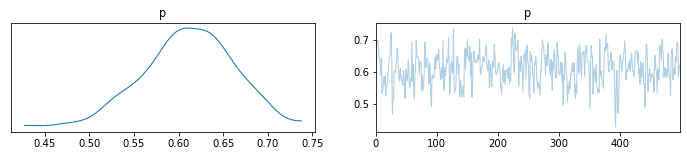

In [32]:
arviz.plot_trace(fit)